In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler

from sklearn.neural_network import MLPClassifier


usps_train = np.genfromtxt("zip.train", delimiter=" ")
usps_test = np.genfromtxt("zip.test", delimiter = " ")

# 1
Let's load the datasets first

In [17]:
wine = load_wine()
usps = np.concatenate((usps_train, usps_test))
usps_data = pd.DataFrame(usps)

In [18]:
mail_y = usps_data.loc[:,0]
mail_X = usps_data.loc[:, 1:usps_data.shape[1]]

# 2
Now, let's divide the sets into training and test sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(mail_X, mail_y, random_state = 307)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(pd.DataFrame(wine.data), pd.DataFrame(wine.target), random_state = 307)

# 3
First, we'll get the generalisation accuracy of the MLPClassifier for both the datasets and for the default parameters

In [20]:
mlp_default = MLPClassifier()
print("The default generalisation accuracy for the USPS dataset is: ", np.mean(cross_val_score(mlp_default, X_train, y_train)))
print("The default generalisation accuracy for the Wine dataset is: ", np.mean(cross_val_score(mlp_default, X_train_w, y_train_w)))

The default generalisation accuracy for the USPS dataset is:  0.9631434257416579
The default generalisation accuracy for the Wine dataset is:  0.6413105413105413


/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

### Generalisation accuracy with default parameters from cross-validation
As we can see above, the generalisation accuracy with the default parameters for the USPS and Wine datasets are **0.962** and **0.761**, respectively.

# 4 
Now we'll remove the warnings and train the MLP with the tweaked parametes, after which we'll get the generalisation accuracy for both the sets. Let's try using the parameters we used in the lab.

In [21]:
mlp_tweaked = MLPClassifier(max_iter=1000, solver='lbfgs', activation='tanh', random_state=307, hidden_layer_sizes=[10])
print("The tweaked parameter generalisation accuracy for the USPS dataset is: ", np.mean(cross_val_score(mlp_tweaked, X_train, y_train)))
print("The tweaked parameter generalisation accuracy for the Wine dataset is: ", np.mean(cross_val_score(mlp_tweaked, X_train_w, y_train_w)))

The tweaked parameter generalisation accuracy for the USPS dataset is:  0.8993266585417278
The tweaked parameter generalisation accuracy for the Wine dataset is:  0.41367521367521365


/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

### Generalisation accuracy with tweaked parameters from cross-validation
USPS: 0.898\
Wine: 0.413

Now, let us fit and score the tweaked MLP on both the datasets

In [22]:
mlp_tweaked.fit(X_train, y_train)
mlp_tweaked.score(X_test,y_test)

0.8984946236559139

In [23]:
mlp_tweaked.fit(X_train_w, y_train_w)
mlp_tweaked.score(X_test_w,y_test_w)

/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.35555555555555557

### Test score with tweaked parameters
USPS: 0.895\
Wine: 0.355

# 5
Let's find the test error rate for this classifier for both the datasets and see how it compares to the accuracy we got from the score function

In [24]:
mlp_tweaked.fit(X_train, y_train)
mlp_tweaked_predictions_USPS = mlp_tweaked.predict(X_test)
error_count = 0
for i in range(len(mlp_tweaked_predictions_USPS)):
    prediction = mlp_tweaked_predictions_USPS[i]
    if(prediction != y_test.iloc[i]):
        error_count += 1

print("The error count for USPS dataset is", error_count)
print("Test error rate for the USPS dataset is", error_count / len(y_train))

The error count for USPS dataset is 236
Test error rate for the USPS dataset is 0.03384483005879822


In [25]:
mlp_tweaked.fit(X_train_w, y_train_w)
mlp_tweaked_predictions_wine = mlp_tweaked.predict(X_test_w)
error_count = 0
for i in range(len(mlp_tweaked_predictions_wine)):
    prediction = mlp_tweaked_predictions_wine[i]
    if(prediction != y_test_w.iloc[i][0]):
        error_count += 1

print("The error count for wine dataset is", error_count)
print("Test error rate for the wine dataset is", error_count / len(y_train))

The error count for wine dataset is 29
Test error rate for the wine dataset is 0.00415889860892012


/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test error rate and the accuracy don't add up to 1, which shouldn't happen. Maybe the probability function that we use to predict the output of the MLP plays a role here? Or it could be an imbalanced classification.

# 6 
Let's make a pipeline with MinMaxScaler and see its performance first

In [26]:
pipe_mlp = make_pipeline(MinMaxScaler(), MLPClassifier(max_iter = 5000, random_state=307))
pipe_mlp.steps

[('minmaxscaler', MinMaxScaler()),
 ('mlpclassifier', MLPClassifier(max_iter=5000, random_state=307))]

# 7
Now let's use GridSearchCV with this pipeline

In [27]:
param_grid = {
    'mlpclassifier__solver': ['lbfgs', 'sgd', 'adam'],
    'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlpclassifier__hidden_layer_sizes': [[10], [20], [10,10]],
}
minmax_grid = GridSearchCV(pipe_mlp, param_grid=param_grid, cv=5, n_jobs=-1) 

In [28]:
minmax_grid.fit(X_train, y_train)

print("Best cross-validation accuracy for the USPS dataset is:", minmax_grid.best_score_) 
print("Test set score for the USPS dataset:", minmax_grid.score(X_test, y_test)) 
print("Best parameters for the USPS dataset are:", minmax_grid.best_params_)

minmax_grid_predictions_USPS = minmax_grid.predict(X_test)

error_count = 0
for i in range(len(minmax_grid_predictions_USPS)):
    prediction = minmax_grid_predictions_USPS[i]
    if(prediction != y_test.iloc[i]):
        error_count += 1

print("Error count for MLP Classifier with grid search and MinMaxScaler for the USPS dataset is: ", error_count)
print("Test error rate for the same is: ", error_count / len(y_train))

Best cross-validation accuracy for the USPS dataset is: 0.9528180682186329
Test set score for the USPS dataset: 0.9561290322580646
Best parameters for the USPS dataset are: {'mlpclassifier__activation': 'relu', 'mlpclassifier__hidden_layer_sizes': [20], 'mlpclassifier__solver': 'adam'}
Error count for MLP Classifier with grid search and MinMaxScaler for the USPS dataset is:  102
Test error rate for the same is:  0.014627850279650079


In [29]:
minmax_grid.fit(X_train_w, y_train_w)

print("Best cross-validation accuracy for the wine dataset is:", minmax_grid.best_score_) 
print("Test set score for the wine dataset:", minmax_grid.score(X_test_w, y_test_w)) 
print("Best parameters for the wine dataset are:", minmax_grid.best_params_)

minmax_grid_predictions_wine = minmax_grid.predict(X_test_w)

error_count = 0
for i in range(len(minmax_grid_predictions_wine)):
    prediction = minmax_grid_predictions_wine[i]
    if(prediction != y_test_w.iloc[i][0]):
        error_count += 1

print("Error count for MLP Classifier with grid search and MinMaxScaler for the wine dataset is: ", error_count)
print("Test error rate for the same is: ", error_count / len(y_train_w))

/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best cross-validation accuracy for the wine dataset is: 0.9700854700854702
Test set score for the wine dataset: 1.0
Best parameters for the wine dataset are: {'mlpclassifier__activation': 'tanh', 'mlpclassifier__hidden_layer_sizes': [20], 'mlpclassifier__solver': 'sgd'}
Error count for MLP Classifier with grid search and MinMaxScaler for the wine dataset is:  0
Test error rate for the same is:  0.0


Now, let's do the above steps for different kinds of normalization.

In [30]:
pipe_mlp_standard = make_pipeline(StandardScaler(), MLPClassifier(max_iter = 5000, random_state=307))
pipe_mlp_standard.steps

[('standardscaler', StandardScaler()),
 ('mlpclassifier', MLPClassifier(max_iter=5000, random_state=307))]

In [31]:
standard_grid = GridSearchCV(pipe_mlp_standard, param_grid=param_grid, cv=5, n_jobs=-1) 

In [32]:
standard_grid.fit(X_train, y_train)

print("Standard Scaler: ")
print("Best cross-validation accuracy for the USPS dataset is:", standard_grid.best_score_) 
print("Test set score for the USPS dataset:", standard_grid.score(X_test, y_test)) 
print("Best parameters for the USPS dataset are:", standard_grid.best_params_)

standard_grid_predictions_USPS = standard_grid.predict(X_test)

error_count = 0
for i in range(len(standard_grid_predictions_USPS)):
    prediction = standard_grid_predictions_USPS[i]
    if(prediction != y_test.iloc[i]):
        error_count += 1

print("Error count for MLP Classifier with grid search and StandardScaler for the USPS dataset is: ", error_count)
print("Test error rate for the same is: ", error_count / len(y_train))

Standard Scaler: 
Best cross-validation accuracy for the USPS dataset is: 0.9502364974313879
Test set score for the USPS dataset: 0.9475268817204301
Best parameters for the USPS dataset are: {'mlpclassifier__activation': 'relu', 'mlpclassifier__hidden_layer_sizes': [20], 'mlpclassifier__solver': 'adam'}
Error count for MLP Classifier with grid search and StandardScaler for the USPS dataset is:  122
Test error rate for the same is:  0.017496056216836368


In [33]:
standard_grid.fit(X_train_w, y_train_w)

print("Best cross-validation accuracy for the wine dataset is:", standard_grid.best_score_) 
print("Test set score for the wine dataset:", standard_grid.score(X_test_w, y_test_w)) 
print("Best parameters for the wine dataset are:", standard_grid.best_params_)

standard_grid_predictions_wine = standard_grid.predict(X_test_w)

error_count = 0
for i in range(len(standard_grid_predictions_wine)):
    prediction = standard_grid_predictions_wine[i]
    if(prediction != y_test_w.iloc[i][0]):
        error_count += 1

print("Error count for MLP Classifier with grid search and StandardScaler for the wine dataset is: ", error_count)
print("Test error rate for the same is: ", error_count / len(y_train_w))

Best cross-validation accuracy for the wine dataset is: 0.9777777777777779
Test set score for the wine dataset: 1.0
Best parameters for the wine dataset are: {'mlpclassifier__activation': 'identity', 'mlpclassifier__hidden_layer_sizes': [20], 'mlpclassifier__solver': 'sgd'}
Error count for MLP Classifier with grid search and StandardScaler for the wine dataset is:  0
Test error rate for the same is:  0.0


/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
pipe_mlp_robust = make_pipeline(RobustScaler(), MLPClassifier(max_iter = 10000, random_state=307))
pipe_mlp_robust.steps

[('robustscaler', RobustScaler()),
 ('mlpclassifier', MLPClassifier(max_iter=10000, random_state=307))]

In [35]:
robust_grid = GridSearchCV(pipe_mlp_robust, param_grid=param_grid, cv=5, n_jobs=-1) 

In [36]:
robust_grid.fit(X_train, y_train)

print("Robust Scaler: ")
print("Best cross-validation accuracy for the USPS dataset is:", robust_grid.best_score_) 
print("Test set score for the USPS dataset:", robust_grid.score(X_test, y_test)) 
print("Best parameters for the USPS dataset are:", robust_grid.best_params_)

robust_grid_predictions_USPS = robust_grid.predict(X_test)

error_count = 0
for i in range(len(robust_grid_predictions_USPS)):
    prediction = robust_grid_predictions_USPS[i]
    if(prediction != y_test.iloc[i]):
        error_count += 1

print("Error count for MLP Classifier with grid search and RobustScaler for the USPS dataset is: ", error_count)
print("Test error rate for the same is: ", error_count / len(y_train))

Robust Scaler: 
Best cross-validation accuracy for the USPS dataset is: 0.9475121745524856
Test set score for the USPS dataset: 0.9496774193548387
Best parameters for the USPS dataset are: {'mlpclassifier__activation': 'relu', 'mlpclassifier__hidden_layer_sizes': [20], 'mlpclassifier__solver': 'adam'}
Error count for MLP Classifier with grid search and RobustScaler for the USPS dataset is:  117
Test error rate for the same is:  0.016779004732539796


In [37]:
robust_grid.fit(X_train_w, y_train_w)

print("Best cross-validation accuracy for the wine dataset is:", robust_grid.best_score_) 
print("Test set score for the wine dataset:", robust_grid.score(X_test_w, y_test_w)) 
print("Best parameters for the wine dataset are:", robust_grid.best_params_)

robust_grid_predictions_wine = robust_grid.predict(X_test_w)

error_count = 0
for i in range(len(robust_grid_predictions_wine)):
    prediction = robust_grid_predictions_wine[i]
    if(prediction != y_test_w.iloc[i][0]):
        error_count += 1

print("Error count for MLP Classifier with grid search and RobustScaler for the wine dataset is: ", error_count)
print("Test error rate for the same is: ", error_count / len(y_train_w))

/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

Best cross-validation accuracy for the wine dataset is: 0.9774928774928775
Test set score for the wine dataset: 1.0
Best parameters for the wine dataset are: {'mlpclassifier__activation': 'relu', 'mlpclassifier__hidden_layer_sizes': [20], 'mlpclassifier__solver': 'adam'}
Error count for MLP Classifier with grid search and RobustScaler for the wine dataset is:  0
Test error rate for the same is:  0.0


/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
pipe_mlp_norm = make_pipeline(Normalizer(), MLPClassifier(max_iter = 10000, random_state=307))
pipe_mlp_norm.steps

[('normalizer', Normalizer()),
 ('mlpclassifier', MLPClassifier(max_iter=10000, random_state=307))]

In [39]:
norm_grid = GridSearchCV(pipe_mlp_norm, param_grid=param_grid, cv=5, n_jobs=-1) 

In [40]:
norm_grid.fit(X_train, y_train)

print("Normalizer: ")
print("Best cross-validation accuracy for the USPS dataset is:", norm_grid.best_score_) 
print("Test set score for the USPS dataset:", norm_grid.score(X_test, y_test)) 
print("Best parameters for the USPS dataset are:", norm_grid.best_params_)

norm_grid_predictions_USPS = norm_grid.predict(X_test)

error_count = 0
for i in range(len(norm_grid_predictions_USPS)):
    prediction = norm_grid_predictions_USPS[i]
    if(prediction != y_test.iloc[i]):
        error_count += 1

print("Error count for MLP Classifier with grid search and Normalizer for the USPS dataset is: ", error_count)
print("Test error rate for the same is: ", error_count / len(y_train))

Normalizer: 
Best cross-validation accuracy for the USPS dataset is: 0.9551132091966081
Test set score for the USPS dataset: 0.9552688172043011
Best parameters for the USPS dataset are: {'mlpclassifier__activation': 'logistic', 'mlpclassifier__hidden_layer_sizes': [20], 'mlpclassifier__solver': 'adam'}
Error count for MLP Classifier with grid search and Normalizer for the USPS dataset is:  104
Test error rate for the same is:  0.014914670873368709


In [41]:
norm_grid.fit(X_train_w, y_train_w)

print("Best cross-validation accuracy for the wine dataset is:", norm_grid.best_score_) 
print("Test set score for the wine dataset:", norm_grid.score(X_test_w, y_test_w)) 
print("Best parameters for the wine dataset are:", norm_grid.best_params_)

norm_grid_predictions_wine = norm_grid.predict(X_test_w)

error_count = 0
for i in range(len(norm_grid_predictions_wine)):
    prediction = norm_grid_predictions_wine[i]
    if(prediction != y_test_w.iloc[i][0]):
        error_count += 1

print("Error count for MLP Classifier with grid search and Normalizer for the wine dataset is: ", error_count)
print("Test error rate for the same is: ", error_count / len(y_train_w))

/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was ex

/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/kevinvegda/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best cross-validation accuracy for the wine dataset is: 0.9247863247863247
Test set score for the wine dataset: 0.8888888888888888
Best parameters for the wine dataset are: {'mlpclassifier__activation': 'identity', 'mlpclassifier__hidden_layer_sizes': [20], 'mlpclassifier__solver': 'adam'}
Error count for MLP Classifier with grid search and Normalizer for the wine dataset is:  5
Test error rate for the same is:  0.03759398496240601


As we can see, the accuracies and test error rates for the different kinds of normalization were as follows:

### Accuracies and test errors for pipelines

## USPS Dataset
### 1. MinMaxScaler:
Test set score: 0.956 \
Error count:  102 \
Test error rate:  0.0146

### 2. Standard Scaler
Test set score: 0.9475268817204301\
Error count:  122\
Test error rate:  0.01749

### 3. Robust Scaler
Test set score: 0.9496774193548387\
Error count:  117\
Test error rate:  0.0167

### 4. Normalizer
Test set score: 0.9552688172043011\
Error count:  104\
Test error rate:  0.0149

## Wine Dataset
### 1. MinMaxScaler:
Test set score: 1.0\
Error count:  0\
Test error rate:  0.0

### 2. Standard Scaler
Test set score: 1.0\
Error count:  0\
Test error rate:  0.0

### 3. Robust Scaler
Test set score: 1.0\
Error count:  0\
Test error rate:  0.0

### 4. Normalizer
Test set score: 0.8888888888888888\
Error count:  5\
Test error rate:  0.03759

For the smaller Wine dataset, all the methods of normalization other than the Normalizer gives an error rate of 0, likely because it's such a small dataset and we have enough training data. For the much bigger USPS dataset, we can see that the MinMaxScaler and Normalizer give the best results.

# 8
Now, let's implement the cross-conformal predictor for both of these datasets by using the KFold class from sklearn

In [27]:
kf = KFold(shuffle=True, random_state=307)
kf

KFold(n_splits=5, random_state=307, shuffle=True)

These are the labels in the USPS dataset and the wine dataset, respectively. We'll have to implement the cross-conformal predictor by finding the rank of the test sample in K folds and summing it over all of them after assuming a postulated label. Let's start with the Wine dataset. Later, we'll plot calibration curves to prove the validity of the cross-conformal predictor as well as find the average false p-values for both datasets.

In [28]:
def rankData(a):
    u, v = np.unique(a, return_inverse=True)
    return (np.cumsum(np.bincount(v)) - 1)[v]

In [29]:
postulatedLabels = list(set(wine.target))
pValues = []
for sample in X_test_w.values:
    kfold_ranks = []
    for rest_index, fold_index in kf.split(X_train_w):
        X_rest, X_fold = np.take(X_train_w, rest_index, 0), np.take(X_train_w, fold_index, 0)
        y_rest, y_fold = np.take(y_train_w, rest_index, 0), np.take(y_train_w, fold_index, 0)
        minmax_grid.fit(X_rest,y_rest) #train the model on the rest of the folds
        
        ranks_for_this_fold = {}
        for postulatedLabel in postulatedLabels:
            extended_cal_set = np.vstack((X_fold, sample))
            conf_scores = minmax_grid.predict_proba(extended_cal_set)
            
            cal_conf_scores = np.array([])
        
            for i in range(len(y_fold)):
                label = y_fold.iloc[i]
                actualLabelIndex = postulatedLabels.index(label[0])
                cal_conf_scores = np.append(cal_conf_scores, conf_scores[i][actualLabelIndex])
            
            postulatedLabelIndex = postulatedLabels.index(postulatedLabel)
            cal_conf_scores = np.append(cal_conf_scores, conf_scores[-1][postulatedLabelIndex])
            ranks = rankData(cal_conf_scores)
            ranks_for_this_fold[postulatedLabel] = ranks[-1]
        
        kfold_ranks = np.append(kfold_ranks, ranks_for_this_fold)
    
    pValue = {}
    for label in postulatedLabels:
        rank = 0
        for fold in kfold_ranks:
            rank += fold[label]
        pValue[label] = (rank + 1)/(len(X_test_w) + 1)
    pValues = np.append(pValues, pValue)

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Text(0.5, 1.0, 'Calibration curve for the Wine dataset')

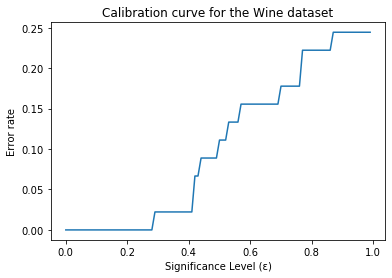

In [30]:
eps = np.zeros(100)  # a range of significance levels
err = np.zeros(100)  # the corresponding error rates
n_test = len(X_test_w)

for k in range(100):
    eps[k] = k/100 # considering eps = k%
    err[k] = 0 # initializing the error rate for j in range(n test):
    for j in range(n_test):
        label = y_test_w.iloc[j]
        if (pValues[j][label[0]] <= eps[k]): # if we made an error err[k] = err[k] + 1 # count this error
            err[k] = err[k] + 1 # count this error
    err[k] = err[k] / n_test # number of errors -> error rate plt.plot(eps,err)
plt.plot(eps,err)
plt.xlabel("Significance Level (ε)")
plt.ylabel("Error rate")
plt.title("Calibration curve for the Wine dataset")

This worked for the smaller Wine dataset, but for the bigger USPS dataset, we can't train the model inside two for loops, as that would take way too long. We'll have to switch up the for loops and give up storage complexity to save on computational time.

As we see above, we get a calibration curve that's somewhat like a diagonal, but we can see the steps making it up because the Wine dataset is pretty small. We should try getting the curve for the USPS dataset and see how we fare.

In [31]:
postulatedLabels_USPS = list(set(mail_y))
pValues_USPS = []

for rest_index, fold_index in kf.split(X_train):
    X_rest, X_fold = np.take(X_train, rest_index, 0), np.take(X_train, fold_index, 0)
    y_rest, y_fold = np.take(y_train, rest_index, 0), np.take(y_train, fold_index, 0)
    minmax_grid.fit(X_rest,y_rest) #train the model on the rest of the folds
    
    ranksForLabels = {}
    for postulatedLabel in postulatedLabels_USPS:
        sampleWiseRanks = []
        postulatedLabelIndex = postulatedLabels_USPS.index(postulatedLabel)
        
        for sample in X_test.values:
            extended_cal_set = np.vstack((X_fold, sample))
            conf_scores = minmax_grid.predict_proba(extended_cal_set)
            
            cal_conf_scores = np.array([])
        
            for i in range(len(y_fold)):
                label = y_fold.iloc[i]
                actualLabelIndex = postulatedLabels_USPS.index(label)
                cal_conf_scores = np.append(cal_conf_scores, conf_scores[i][actualLabelIndex])
            
            cal_conf_scores = np.append(cal_conf_scores, conf_scores[-1][postulatedLabelIndex])
            ranks = rankData(cal_conf_scores)
            sampleWiseRanks = np.append(sampleWiseRanks, ranks[-1])
        
        ranksForLabels[postulatedLabel] = sampleWiseRanks
    pValues_USPS.append(ranksForLabels)

Let's add up the foldwise ranks that we got from the above so we can calculate the P-values

In [57]:
rankSum_USPS = {}

for label in postulatedLabels_USPS:
    rankSum_USPS[label] = []

for fold in pValues_USPS:
    for key in fold:
        labelArr = fold[key]
        if(len(rankSum_USPS[key]) == 0):
            rankSum_USPS[key] = labelArr
        else:
            rankSum_USPS[key] = np.add(rankSum_USPS[key], labelArr)

rankSum_USPS

{0.0: array([4.000e+00, 3.700e+01, 1.046e+03, ..., 5.927e+03, 3.000e+01,
        1.000e+00]),
 1.0: array([54., 36., 22., ...,  0.,  4.,  2.]),
 2.0: array([1390.,  100.,   22., ...,    9.,   41.,    7.]),
 3.0: array([1.00e+00, 2.83e+02, 6.40e+01, ..., 7.00e+00, 7.00e+00, 3.55e+03]),
 4.0: array([66.,  3.,  7., ...,  0.,  3.,  0.]),
 5.0: array([  8., 473., 195., ...,   6.,  11.,  33.]),
 6.0: array([1.230e+02, 4.800e+01, 1.400e+01, ..., 3.000e+00, 3.552e+03,
        0.000e+00]),
 7.0: array([ 6., 20., 11., ...,  4.,  1.,  6.]),
 8.0: array([24.,  4., 37., ...,  1.,  8.,  4.]),
 9.0: array([4., 0., 1., ..., 2., 1., 1.])}

In [59]:
pValues_for_USPS = np.array([])
n_test = len(X_test)

for i in range(n_test):
    pValues_for_USPS = np.append(pValues_for_USPS, {})
    for label in postulatedLabels_USPS:
        rank = rankSum_USPS[label][i]
        pValue = (rank + 1)/(n_test + 1)
        pValues_for_USPS[i][label] = pValue

pValues_for_USPS

array([{0.0: 0.0021496130696474634, 1.0: 0.023645743766122097, 2.0: 0.5980223559759243, 3.0: 0.0008598452278589854, 4.0: 0.02880481513327601, 5.0: 0.003869303525365434, 6.0: 0.05331040412725709, 7.0: 0.0030094582975064487, 8.0: 0.010748065348237317, 9.0: 0.0021496130696474634},
       {0.0: 0.01633705932932072, 1.0: 0.01590713671539123, 2.0: 0.043422184006878764, 3.0: 0.12209802235597593, 4.0: 0.0017196904557179708, 5.0: 0.20378331900257954, 6.0: 0.02106620808254514, 7.0: 0.009028374892519347, 8.0: 0.0021496130696474634, 9.0: 0.0004299226139294927},
       {0.0: 0.45012897678417885, 1.0: 0.009888220120378332, 2.0: 0.009888220120378332, 3.0: 0.027944969905417026, 4.0: 0.0034393809114359416, 5.0: 0.08426483233018056, 6.0: 0.006448839208942391, 7.0: 0.005159071367153913, 8.0: 0.01633705932932072, 9.0: 0.0008598452278589854},
       ...,
       {0.0: 2.5485812553740326, 1.0: 0.0004299226139294927, 2.0: 0.004299226139294927, 3.0: 0.0034393809114359416, 4.0: 0.0004299226139294927, 5.0: 0.003

Text(0.5, 1.0, 'Calibration curve for the USPS dataset')

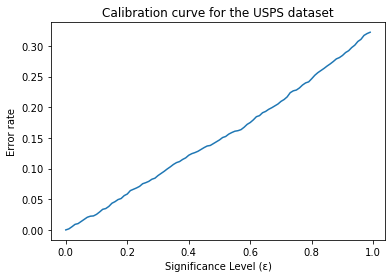

In [63]:
eps = np.zeros(100)  # a range of significance levels
err = np.zeros(100)  # the corresponding error rates
n_test = len(X_test)

for k in range(100):
    eps[k] = k/100 # considering eps = k%
    err[k] = 0 # initializing the error rate for j in range(n test):
    for j in range(n_test):
        label = y_test.iloc[j]
        if (pValues_for_USPS[j][label] <= eps[k]): # if we made an error err[k] = err[k] + 1 # count this error
            err[k] = err[k] + 1 # count this error
    err[k] = err[k] / n_test # number of errors -> error rate plt.plot(eps,err)
plt.plot(eps,err)
plt.xlabel("Significance Level (ε)")
plt.ylabel("Error rate")
plt.title("Calibration curve for the USPS dataset")

As we can see, the calibration curve for the USPS dataset is pretty close to X = Y

In [78]:
totalSum_falsePValues_wine = 0
totalCount = 0
for i in (range(len(X_test_w))):
    sample_pValues_map = pValues[i]
    sample_pValues = np.array(list(sample_pValues_map.values()))
    sample_false_pValues = np.delete(sample_pValues, sample_pValues.argmax())
    totalCount += len(sample_false_pValues)
    totalSum_falsePValues_wine += np.sum(sample_false_pValues)
    
print("The average false p-value for the wine dataset is: ", totalSum_falsePValues_wine/totalCount)

The average false p-value for the wine dataset is:  0.02415458937198067


In [82]:
totalSum_falsePValues_USPS = 0
totalCount = 0
for i in (range(len(X_test))):
    sample_pValues_map = pValues_for_USPS[i]
    sample_pValues = np.array(list(sample_pValues_map.values()))
    sample_false_pValues = np.delete(sample_pValues, sample_pValues.argmax())
    totalCount += len(sample_false_pValues)
    totalSum_falsePValues_USPS += np.sum(sample_false_pValues)
    
print("The average false p-value for the USPS dataset is: ", totalSum_falsePValues_USPS/totalCount)

The average false p-value for the USPS dataset is:  0.008278552871235871


The average false p-values for the Wine and USPS datasets are **0.02415** and **0.00827**, respectively.